In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
left = np.array([
    [0.8, 2],
    [0.7, 2.35],
    [0.6, 2.6],
    [0.5, 3.3],
    [0.4, 4.15],
    [0.3, 5.15]])

right = np.array([
    [-0.8, 2],
    [-0.7, 2.35],
    [-0.6, 2.6],
    [-0.5, 3.3],
    [-0.4, 4.15],
    [-0.3, 5.15]])


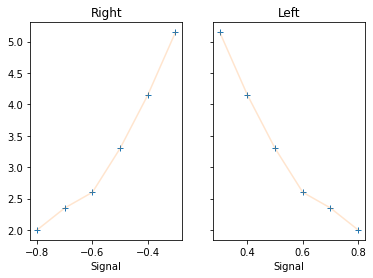

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(right[:, 0], right[:, 1], '+')
ax1.plot(right[:, 0], right[:, 1], alpha=0.2)
ax1.set(xlabel="Signal")
ax1.set_title("Right")

ax2.plot(left[:, 0], left[:, 1], '+')
ax2.plot(left[:, 0], left[:, 1], alpha=0.2)
ax2.set(xlabel="Signal")
ax2.set_title("Left")

plt.show()

In [73]:
import math

L=0.31
W=0.0

def delta(R):
    return math.degrees(math.atan2(L, R))

left_angles = np.array([[signal, delta(R)] for [signal, R] in left])
right_angles = np.array([[signal, delta(R)] for [signal, R] in right])

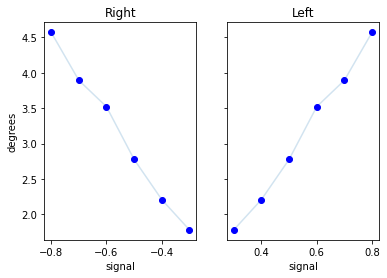

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(right_angles[:, 0], right_angles[:, 1], alpha=0.2)
ax1.plot(right_angles[:, 0], right_angles[:, 1], 'ob')
ax1.set(xlabel="signal")
ax1.set(ylabel="degrees")
ax1.set_title("Right")

ax2.plot(left_angles[:, 0], left_angles[:, 1], alpha=0.2)
ax2.plot(left_angles[:, 0], left_angles[:, 1], 'ob')
ax2.set(xlabel="signal")
ax2.set_title("Left")

plt.show()

In [74]:
combined_angles = []

for [signal, delta] in left_angles:
    combined_angles += [[signal, delta]]
    
for [signal, delta] in right_angles:
    combined_angles += [[signal, -delta]]
    
combined_angles = np.array(combined_angles)
combined_angles

array([[ 0.8       ,  8.81073299],
       [ 0.7       ,  7.51477754],
       [ 0.6       ,  6.79932144],
       [ 0.5       ,  5.36658178],
       [ 0.4       ,  4.27199171],
       [ 0.3       ,  3.44471572],
       [-0.8       , -8.81073299],
       [-0.7       , -7.51477754],
       [-0.6       , -6.79932144],
       [-0.5       , -5.36658178],
       [-0.4       , -4.27199171],
       [-0.3       , -3.44471572]])

In [75]:
x = combined_angles[:, 1]
y = combined_angles[:, 0]

A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]

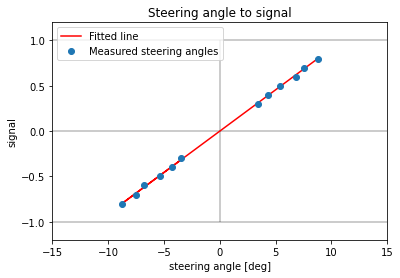



Signal(delta)=0.091*delta + -0.000


In [80]:
plt.plot(x, a*x + b, 'r', label='Fitted line')
plt.plot(combined_angles[:, 1], combined_angles[:, 0], 'o', label="Measured steering angles")
plt.vlines(0, -1, 1, linewidth=0.4)
plt.hlines([-1, 0, 1], -15, 15, linewidth=0.4)
plt.ylabel("signal")
plt.xlabel("steering angle [deg]")
plt.xlim(-15, 15)
plt.ylim(-1.2, 1.2)
plt.title("Steering angle to signal")
plt.legend()

plt.show()
#plt.savefig("steering_angle_to_pwm_sim.eps")

print("\n")
print("Signal(delta)={:.3f}*delta + {:.3f}".format(a, b))